## Klasyfikacja 
Klasyfikacja to rodzaj algorytmu statystycznego, który przydziela obserwacje statystyczne do klas, bazując na atrybutach tych obserwacji.

**Definicja:**
Dla danego zbioru danych trenujących $\{(x_1,y_1),\ldots,(x_n,y_n)\}$ algorytm potrafi znaleźć funkcję klasyfikującją $h: X -> Y$, która przydziela obiektowi $x\in X$ klasę $y \in Y$.

- prawdopodobieństwo aposteriori: $P(Y=i|X)$ *
- funkcja klasyfikacyjna przyjmuje postać: $h(X) = argmax_{1,\ldots,y} P(Y=i|X)$

*większość klasyfikatorów modeluje prawdopodobieństwa, wyjątek stanowi SVM

Przykłady klasyfikacji:
- wykrywanie czy pacjent jest chory na daną chorobę na podstawie wyników badań
- klasyfikacja maili jako spam/nie-spam
- czy transakcja dokonana na koncie klienta banku to oszustwo/kradzież czy też normalna transakcja
- rozpoznawania na obrazu różnych rodzajów zwierząt
- rozpoznawanie czy pasażer przeżyje katastrofę na Titanicu

**Na potrzeby uproszczenia wyjaśniania w dalszej części labów, skupimy się tylko na klasyfikacji binarnej.**

Zajmiemy się zbiorem gdzie klasyfikujemy u pacjentów czy występuje choroba serca czy nie.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed = 42

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
# Szybko sprawdzamy podstawowe cechy danych
na_ratio_cols = data.isna().mean(axis=0)
na_ratio_cols

sbp          0.0
tobacco      0.0
ldl          0.0
adiposity    0.0
famhist      0.0
typea        0.0
obesity      0.0
alcohol      0.0
age          0.0
chd          0.0
dtype: float64

In [4]:
y = np.array(data['chd'])
X = data.drop(['chd','famhist'],axis=1)
y

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [5]:
data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [6]:
# Szybkie ćwiczenie - wykonaj dowolne kodowanie zmiennej kategorycznej
cleanup_nums = {"famhist":     {"Present": 1, "Absent": 0}}
data = data.replace(cleanup_nums)
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


## Sposoby podziału danych
- Jak radzić sobie z overfitingiem?
- Jakie znacie sposoby podziału danych na treningowe i testowe?

![image.png](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)

https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/

## Zbiór treningowy, walidacyjny i testowy¶
Prosty podział danych na część, na której uczymy model i na część która służy nam do sprawdzenia jego skuteczności.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
)

<AxesSubplot:>

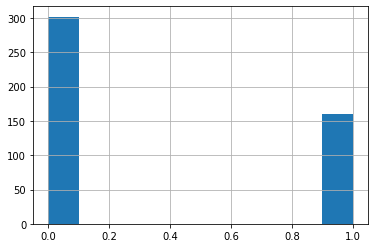

In [8]:
pd.Series(y).hist()

<AxesSubplot:>

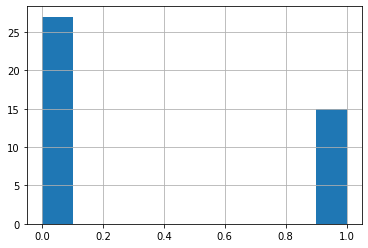

In [9]:
pd.Series(y_test).hist()

<AxesSubplot:>

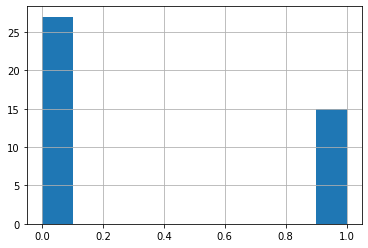

In [10]:
pd.Series(y_test).hist()

In [11]:
print(X.shape,X_train.shape, X_val.shape, X_test.shape)

(462, 8) (323, 8) (97, 8) (42, 8)


### Jaki znacie najprostszy klasyfikator?

In [12]:
from sklearn.dummy import DummyClassifier

In [13]:
dc = DummyClassifier(strategy='uniform', random_state=42)
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_val)
y_hat = dc.predict(X_val)
print("proba: " + str(y_proba[0:10,0]) + '\ny:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))
sum=0
for i in range(len(y_hat)):
    if y_hat[i]==y_val[i]:
        sum+=1
accuracy=sum/len(y_hat)
print("validation : " + str(accuracy))
sum=0
y_trained=dc.predict(X_train)
for i in range(len(y_trained)):
    if y_trained[i]==y_train[i]:
        sum+=1
accuracy_train=sum/len(y_trained)
print("train : " + str(accuracy_train))

proba: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
y:     [0 1 0 0 0 1 0 0 0 1]
y_hat: [0 0 0 0 0 0 0 1 0 1]
validation : 0.4742268041237113
train : 0.5201238390092879


Przetestujcie jaki będzie wynik działania algorytmu gdy zmienimy parametr *strategy* (oraz porównać accuracy) - podpowiedź: skorzystaj z dokumentacji funkcji

In [14]:
#TODO: policzyć accuracy dla baselinu (z inną strategią niż uniform) na train i validation


In [15]:
dc = DummyClassifier(strategy='most_frequent', random_state=42)
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_val)
y_hat = dc.predict(X_val)
print("proba: " + str(y_proba[0:10,0]) + '\ny:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))
sum=0
for i in range(len(y_hat)):
    if y_hat[i]==y_val[i]:
        sum+=1
accuracy=sum/len(y_hat)
print("validation : " + str(accuracy))
sum=0
y_trained=dc.predict(X_train)
for i in range(len(y_trained)):
    if y_trained[i]==y_train[i]:
        sum+=1
accuracy_train=sum/len(y_trained)
print("train : " + str(accuracy_train))

proba: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
y:     [0 0 0 0 0 0 0 0 0 0]
y_hat: [0 0 0 0 0 0 0 1 0 1]
validation : 0.6597938144329897
train : 0.653250773993808


In [16]:
dc = DummyClassifier(strategy='prior', random_state=42)
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_val)
y_hat = dc.predict(X_val)
print("proba: " + str(y_proba[0:10,0]) + '\ny:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))
sum=0
for i in range(len(y_hat)):
    if y_hat[i]==y_val[i]:
        sum+=1
accuracy=sum/len(y_hat)
print("validation : " + str(accuracy))
sum=0
y_trained=dc.predict(X_train)
for i in range(len(y_trained)):
    if y_trained[i]==y_train[i]:
        sum+=1
accuracy_train=sum/len(y_trained)
print("train : " + str(accuracy_train))

proba: [0.65325077 0.65325077 0.65325077 0.65325077 0.65325077 0.65325077
 0.65325077 0.65325077 0.65325077 0.65325077]
y:     [0 0 0 0 0 0 0 0 0 0]
y_hat: [0 0 0 0 0 0 0 1 0 1]
validation : 0.6597938144329897
train : 0.653250773993808


In [17]:
dc = DummyClassifier(strategy='stratified', random_state=42)
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_val)
y_hat = dc.predict(X_val)
print("proba: " + str(y_proba[0:10,0]) + '\ny:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))
sum=0
for i in range(len(y_hat)):
    if y_hat[i]==y_val[i]:
        sum+=1
accuracy=sum/len(y_hat)
print("validation : " + str(accuracy))
sum=0
y_trained=dc.predict(X_train)
for i in range(len(y_trained)):
    if y_trained[i]==y_train[i]:
        sum+=1
accuracy_train=sum/len(y_trained)
print("train : " + str(accuracy_train))

proba: [1. 0. 0. 1. 1. 1. 1. 0. 1. 0.]
y:     [0 1 1 0 0 0 0 1 0 1]
y_hat: [0 0 0 0 0 0 0 1 0 1]
validation : 0.5567010309278351
train : 0.6160990712074303


In [18]:
dc = DummyClassifier(strategy='constant', random_state=42, constant=0 )
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_val)
y_hat = dc.predict(X_val)
print("proba: " + str(y_proba[0:10,0]) + '\ny:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))
sum=0
for i in range(len(y_hat)):
    if y_hat[i]==y_val[i]:
        sum+=1
accuracy=sum/len(y_hat)
print("validation : " + str(accuracy))
sum=0
y_trained=dc.predict(X_train)
for i in range(len(y_trained)):
    if y_trained[i]==y_train[i]:
        sum+=1
accuracy_train=sum/len(y_trained)
print("train : " + str(accuracy_train))

proba: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
y:     [0 0 0 0 0 0 0 0 0 0]
y_hat: [0 0 0 0 0 0 0 1 0 1]
validation : 0.6597938144329897
train : 0.653250773993808


In [19]:
dc = DummyClassifier(strategy='constant', random_state=42, constant=1 )
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_val)
y_hat = dc.predict(X_val)
print("proba: " + str(y_proba[0:10,0]) + '\ny:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))
sum=0
for i in range(len(y_hat)):
    if y_hat[i]==y_val[i]:
        sum+=1
accuracy=sum/len(y_hat)
print("validation : " + str(accuracy))
sum=0
y_trained=dc.predict(X_train)
for i in range(len(y_trained)):
    if y_trained[i]==y_train[i]:
        sum+=1
accuracy_train=sum/len(y_trained)
print("train : " + str(accuracy_train))

proba: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y:     [1 1 1 1 1 1 1 1 1 1]
y_hat: [0 0 0 0 0 0 0 1 0 1]
validation : 0.3402061855670103
train : 0.34674922600619196


- Jakieś inne proste klasyfikatory?

## Regresja logistyczna - czemu by nie prognozować prawdopodobieństwa za pomocą regresji liniowej?

**Przypomnienie:** uogólniony model liniowy: $y_{i}=\beta _{0}1+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip} = x^T \beta$

- Jaki jest podstawowy problem z wykorzystaniem regresji do modelowania prawdopodobieństwa?
- Jakie macie propozycje rozwiązania tego problemu?

$odds = \frac{P(Y=1|X)}{P(Y=0|X)} = \frac{p}{1-p}$ $\in (0,\infty)$

$\log({odds}) \in (-\infty, \infty)$

Co pozwala nam modelować powyższe równanie dzięki regresji liniowej, po przekształceniu równania, uzyskujemy prawdopodobieństwo sukcesu:

$x^T \beta = \log({\frac{p}{1-p}}) \Rightarrow p = \frac{1}{1+\exp({-x^T \beta})}$

![image](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train,y_train)
y_hat = lr.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))
sum=0
for i in range(len(y_hat)):
    if y_hat[i]==y_val[i]:
        sum+=1
accuracy=sum/len(y_hat)
print("validation : " + str(accuracy))
sum=0
y_trained=lr.predict(X_train)
for i in range(len(y_trained)):
    if y_trained[i]==y_train[i]:
        sum+=1
accuracy_train=sum/len(y_trained)
print("train : " + str(accuracy_train))

y:     [1 0 0 1 0 0 0 1 0 1]
y_hat: [0 0 0 0 0 0 0 1 0 1]
validation : 0.6288659793814433
train : 0.7213622291021672


In [21]:
# TODO: policzyć accuracy dla logita z l1, l2, i bez regularyzacji na train i validation
# porównać z baselinem 
# (porównanie accuracy na trainie i devie 2 baselinów i 3 modeli (l1, l2, i bez regularyzacji).

In [22]:
lr = LogisticRegression(max_iter=1000, penalty='l1',solver='liblinear')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))
sum=0
for i in range(len(y_hat)):
    if y_hat[i]==y_val[i]:
        sum+=1
accuracy=sum/len(y_hat)
print("validation : " + str(accuracy))
sum=0
y_trained=lr.predict(X_train)
for i in range(len(y_trained)):
    if y_trained[i]==y_train[i]:
        sum+=1
accuracy_train=sum/len(y_trained)
print("train : " + str(accuracy_train))

y:     [1 0 0 1 0 0 0 1 0 0]
y_hat: [0 0 0 0 0 0 0 1 0 1]
validation : 0.6391752577319587
train : 0.7244582043343654


In [23]:
lr = LogisticRegression(max_iter=1000, penalty='l1',solver='saga')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))
sum=0
for i in range(len(y_hat)):
    if y_hat[i]==y_val[i]:
        sum+=1
accuracy=sum/len(y_hat)
print("validation : " + str(accuracy))
sum=0
y_trained=lr.predict(X_train)
for i in range(len(y_trained)):
    if y_trained[i]==y_train[i]:
        sum+=1
accuracy_train=sum/len(y_trained)
print("train : " + str(accuracy_train))

y:     [0 0 0 1 0 0 0 1 0 0]
y_hat: [0 0 0 0 0 0 0 1 0 1]
validation : 0.7010309278350515
train : 0.7244582043343654


In [24]:
lr = LogisticRegression(max_iter=1000, penalty='l2',solver='saga')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))
sum=0
for i in range(len(y_hat)):
    if y_hat[i]==y_val[i]:
        sum+=1
accuracy=sum/len(y_hat)
print("validation : " + str(accuracy))
sum=0
y_trained=lr.predict(X_train)
for i in range(len(y_trained)):
    if y_trained[i]==y_train[i]:
        sum+=1
accuracy_train=sum/len(y_trained)
print("train : " + str(accuracy_train))

y:     [0 0 0 1 0 0 0 1 0 0]
y_hat: [0 0 0 0 0 0 0 1 0 1]
validation : 0.6907216494845361
train : 0.718266253869969


In [25]:
lr = LogisticRegression(max_iter=1000, penalty='none',solver='saga')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))
sum=0
for i in range(len(y_hat)):
    if y_hat[i]==y_val[i]:
        sum+=1
accuracy=sum/len(y_hat)
print("validation : " + str(accuracy))
sum=0
y_trained=lr.predict(X_train)
for i in range(len(y_trained)):
    if y_trained[i]==y_train[i]:
        sum+=1
accuracy_train=sum/len(y_trained)
print("train : " + str(accuracy_train))

y:     [0 0 0 1 0 0 0 1 0 0]
y_hat: [0 0 0 0 0 0 0 1 0 1]
validation : 0.6907216494845361
train : 0.718266253869969


**Podsumowanie**

- Zauważyć można, że poszczególne solvery mają spory wpływ na accuracy i wyniki uczenia modelu
- Ogólna tendencja wskazuje, że o ile dla modelów train ma zawsze większe accuracy, to dla baselinów wyniki te są bardzo zbliżone
- Modele także wypadają lepiej od baselinów (a przynajmniej po zastosowaniu solvera 'saga')

In [26]:
lr.coef_

array([[-0.0106575 ,  0.06376262,  0.27532893,  0.01608405,  0.00261298,
        -0.10919783,  0.0017442 ,  0.03783187]])

In [27]:
lr.intercept_

array([-0.08325448])

### Jak interpretować wyniki?

In [28]:
# jak się zmieni powyższy wynik gdy zwiększymy wartość czwartej cechy (tj. adiposity) dla pierwszej obserwacji o 1

#solution
experiment=X_val.iloc[0,:]
experiment[3]=experiment[3]+1
np.log(lr.predict_proba(experiment.values.reshape(1,-1))[0,1]/lr.predict_proba(experiment.values.reshape(1,-1))[0,0])

-0.2348858587744127

#### Dlaczego można było się przewidzieć, że taki właśnie będzie wynik?

In [29]:
#solution
np.log(lr.predict_proba(X_val)[0,1]/lr.predict_proba(X_val)[0,0])+lr.coef_[0,3]
# otrzymano taki sam wynik - nie trzeba było wykonywać metody predict

-0.2348858587744126

In [30]:
# TODO Jaki będzie wynik gdy wektor cech będzie miał tylko zerowe elementy?

In [31]:
#solution


#### Dlaczego można było się przewidzieć, że taki właśnie będzie wynik?

In [32]:
#solution
1/(1+np.exp(-lr.intercept_))

array([0.47919839])

- Jakie są zalety regresji logistycznej?

## Drzewo decyzyjne
- Jak wykorzystać model drzewa do predykcji klasyfikacji/regresji?
- jakie problemy może to generować?

In [33]:
from sklearn.tree import DecisionTreeClassifier,plot_tree #export_graphviz
## biblioteka poniżej może być problematyczna na Windows
#import graphviz

tree1 = DecisionTreeClassifier()

tree1.fit(X_train,y_train)
y_hat = tree1.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

#plt.figure(figsize=(20,20))
#splits=tree.plot_tree(tree1, filled=True)

y:     [0 0 0 0 0 0 0 1 0 0]
y_hat: [0 0 0 0 0 0 0 1 0 1]


In [34]:
tree1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [35]:
# TODO spróbujcie wytrenować model ze zmienionymi parametrami

## SVM
Znalezienie równania hiperpłaszczyzny, która najlepiej dzieli nasz zbiór danych na klasy.

**Uwaga: w przypadku SVM nie modelujemy prawdopodobieństwa przynależności do danej klasy - domyślnym wyjściem jest informacja o konkretnej klasie**
- Co jeżeli nie istnieje taka płaszczyzna?
- Co jeżeli nasze dane nie są separowalne liniowo, tylko np. radialnie?

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

https://en.wikipedia.org/wiki/Support-vector_machine

### Kernel trick

![image](https://machine-learning-note.readthedocs.io/en/latest/_images/svm_kernel_trick.png)

https://machine-learning-note.readthedocs.io/en/latest/algorithm/svm.html

In [36]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(X_train,y_train)
y_hat = svm.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

y:     [0 0 0 0 0 0 0 0 0 0]
y_hat: [0 0 0 0 0 0 0 1 0 1]


Jakie są wady?
- trudno dobrać optymalne parametry
- metoda wrażliwa na skalowanie danych
- długo się "uczy"

## Naiwny Klasyfikator Bayesowski
Jest oparty na założeniu o wzajemnej niezależności zmiennych. Często nie mają one żadnego związku z rzeczywistością i właśnie z tego powodu nazywa się je naiwnymi.

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/cae70e6035d9ac52c547bc1c666e372063b85324)

Mianownik nie zależy od C więc nie będziemy go dalej analizować - skupimy się na liczniku.
![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/2d0555690cd428cb6d6a52ea6b6391256125a45c) 

Rekurencyjnie obliczenia będą kontynuowane. Teraz pora zrozumieć dokładniej dlaczego występuje słowo "naiwny" w nazwie metody.
    Zakładamy bowiem że cechy $F_i$ są niezależne czyli ![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/8898f2ee081f407669fdb7a4f60e390615513346)

Ostatecznie wzór to: ![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/a5978cc50b1c3d745ad304987a750aeb4a27df5b)

https://pl.wikipedia.org/wiki/Naiwny_klasyfikator_bayesowski

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)
y_hat = nb.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

y:     [1 1 0 1 0 0 0 1 0 0]
y_hat: [0 0 0 0 0 0 0 1 0 1]


## Lepszy sposób na podział danych na zbiory treningowe i testowe

### Crossvalidation
- Czy możemy stosować CV dzieląc zbiór, tak by w zbiorze walidacyjnym pozostała tylko jedna obserwacja danych?
- Czy sprawdzając performance modelu przez CV, możemy potem nauczyć model na całym zbiorze danych?

In [38]:
from sklearn.model_selection import cross_val_score
X_train_val=pd.concat((X_train,X_val))
y_train_val=np.concatenate((y_train,y_val), axis=0)
cross_val_score(lr, X_train_val, y_train_val, scoring='accuracy', cv = 10)

array([0.64285714, 0.73809524, 0.71428571, 0.66666667, 0.78571429,
       0.61904762, 0.71428571, 0.71428571, 0.73809524, 0.61904762])

## Miary ocen jakości klasyfikatorów
- Jakie znacie miary oceny klasyfikatorów?

### Accuracy
$ACC = \frac{TP+TN}{ALL}$

Bardzo intuicyjna miara - ile obserwacji zakwalifikowaliśmy poprawnie.

- Jaki jest problem z *accuracy*?

### Precision & Recall
$PRECISION = \frac{TP}{TP+FP}= \frac{TP}{\text{TOTAL PREDICTED POSITIVE}}$

$RECALL = \frac{TP}{TP+FN}$

### F1 Score
$F1\_SCORE =\frac{2*PRECISION*RECALL}{PRECISION+RECALL}$

### ROC AUC

![Image](https://mathspace.pl/wp-content/uploads/2016/09/ROC-krzywa.png)

https://mathspace.pl/matematyka/receiver-operating-characteristic-krzywa-roc-czyli-ocena-jakosci-klasyfikacji-czesc-7/

![image](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/data-1.png)

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

**Zadanie** - przetestować 3 modele przedstawione dziś na zajęciach i sprawdzić, który jest lepszy na podstawie wyżej wymienionych miar. Należy zastosować kroswalidację.